CASE 2 - CUSTOMER ORDERS ANALYSIS

In [2]:
#Case2
#import casestudy.csv via pandas module
import pandas as pd
import numpy as np
custdf = pd.read_csv("C:/Users/ramgl/OneDrive/Desktop/internships/Stout/casestudy.csv")

In [93]:
years = sorted(list(set(custdf.loc[:, 'year'])))
#Calculate the Total Revenue
total_revenue_yr = custdf.groupby('year').net_revenue.agg('sum')

#Computation for all questions
dict_byYear = {}
for yr in years:
    dict_byYear[yr] = {}
    dfByYear = custdf[custdf['year']==yr]
    dict_byYear[yr]['dataframe'] = dfByYear
    
    new_customer = set(custdf[custdf['year']==yr].customer_email) - set(custdf[custdf['year']==yr-1].customer_email)
    dict_byYear[yr]['new_customer_revenue'] = custdf[(custdf['customer_email'].isin(new_customer)) & (custdf['year']==yr)].net_revenue.sum()
    dict_byYear[yr]['new_customer_count'] = len(new_customer)
    dict_byYear[yr]['existing_customer_revenue'] = total_revenue_yr[yr] - dict_byYear[yr]['new_customer_revenue']
    lost_customer = set(custdf[custdf['year']==yr-1].customer_email) - set(custdf[custdf['year']==yr].customer_email)
    dict_byYear[yr]['lost_customer_revenue'] = custdf[(custdf['customer_email'].isin(lost_customer)) & (custdf['year']==yr-1)].net_revenue.sum()
    dict_byYear[yr]['tot_customers'] = dfByYear.customer_email.count()
    dict_byYear[yr]['lost_customer_count'] = len(lost_customer)

In [217]:
#working with the computed values found previously
 
for yrKey in dict_byYear:
    print('Customer Values computed for : ',yrKey)
    print('------------------------------------------------------------')
    print('Total revenue: %.2f' % (total_revenue_yr[yrKey]))
    print('New customer revenue: %.2f '% (dict_byYear[yrKey]['new_customer_revenue']))
    if(yrKey-2 in dict_byYear.keys()) :
        print('Existing customer growth: %.2f '% (dict_byYear[yrKey]['existing_customer_revenue'] - (dict_byYear[yrKey-1]['existing_customer_revenue'] if (yrKey-1) in dict_byYear.keys() else 0)))
    print('Lost customer revenue: %.2f' % (dict_byYear[yrKey]['lost_customer_revenue']))
    print('Existing customer revenue: %.2f '% (dict_byYear[yrKey]['existing_customer_revenue']))
    if(yrKey-1 in dict_byYear.keys()) :
        print('Existing customer revenue in prior year %d: %.2f '% (yrKey-1,dict_byYear[yrKey-1]['existing_customer_revenue']))
        print('Total customer count in prior year %d : %d'% (yrKey,dict_byYear[yrKey-1]['tot_customers']))
    print('Total customer count:%d'% (dict_byYear[yrKey]['tot_customers']))
    print('New customer count: %d'% (dict_byYear[yrKey]['new_customer_count']))
    print('Lost customer count:%d'% (dict_byYear[yrKey]['lost_customer_count']))
    print('------------------------------------------------------------')

Customer Values computed for :  2015
------------------------------------------------------------
Total revenue: 29036749.19
New customer revenue: 29036749.19 
Lost customer revenue: 0.00
Existing customer revenue: 0.00 
Total customer count:231294
New customer count: 231294
Lost customer count:0
------------------------------------------------------------
Customer Values computed for :  2016
------------------------------------------------------------
Total revenue: 25730943.59
New customer revenue: 18245491.01 
Lost customer revenue: 21571632.07
Existing customer revenue: 7485452.58 
Existing customer revenue in prior year 2015: 0.00 
Total customer count in prior year 2016 : 231294
Total customer count:204646
New customer count: 145062
Lost customer count:171710
------------------------------------------------------------
Customer Values computed for :  2017
------------------------------------------------------------
Total revenue: 31417495.03
New customer revenue: 28776235.04 
Exi

DATA VIZUALISATIONS FROM THE COMPUTATION AND SOME OBSERVATIONS

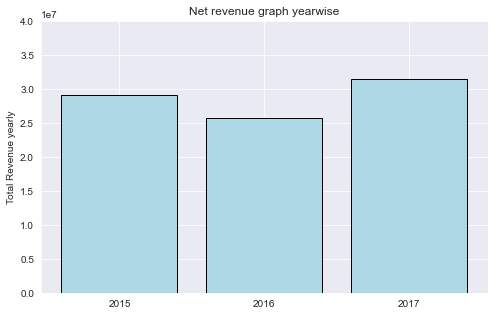

In [201]:
#The Plot is a Net Revenue graph yearwise,which helps us understand whats the revenue generated by customers yearly
#The Revenue each year is not growing instead it is fluctauting this is because of attrition rate of customers
plt.bar(years, total_revenue_yr, color='lightblue',edgecolor='black', linewidth=1, tick_label=years, )
sns.set({'figure.figsize':(8,5)})
plt.ylabel('Years')
plt.ylabel('Total Revenue yearly')
plt.title('Net revenue graph yearwise')
plt.ylim(0,40000000)
plt.savefig('Distribution of TotalRevenue yearwise')


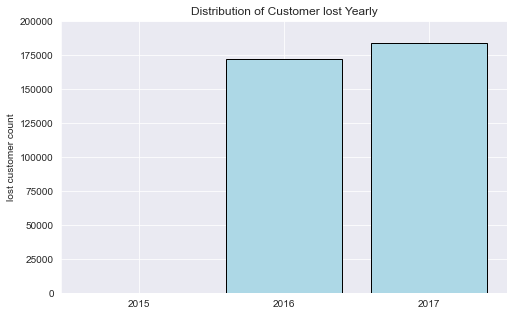

In [200]:
#The plot below depicts the count of customers lost each year
#2015 doesnot have lost customers because we dont have enough data to calculate them,so lose of customers is in 2015 is zero
lost_customer_values = [yrDict['lost_customer_count'] for yrDict in dict_byYear.values()]

sns.set({'figure.figsize':(8,5)})
plt.bar(years,lost_customer_values, color='lightblue',
                       edgecolor='black', linewidth=1, tick_label=years, )
plt.ylabel('Years')
plt.ylabel('lost customer count')
plt.ylim(0,200000)
plt.title('Distribution of Customer lost Yearly')
plt.savefig('Distribution of customers lost yearwise.jpg')

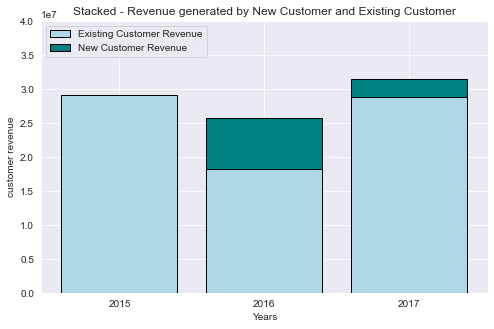

In [199]:
#The Plot below is a Stacked Plot of Revenue generated by Existing and New Customers
#2015 year is observed to have no Existing customers as we din have data beyond 2015,hence all customers are considered new.
new_cust_revs = [yrDict['new_customer_revenue'] for yrDict in dict_byYear.values()]
ext_cust_revs = [yrDict['existing_customer_revenue'] for yrDict in dict_byYear.values()]

sns.set({'figure.figsize':(8,5)})
ax = plt.gca()
plt.bar(years,new_cust_revs, color='lightblue',
                       edgecolor='black', linewidth=1, tick_label=years, )
plt.bar(years,ext_cust_revs, color='teal', bottom=new_cust_revs,
                       edgecolor='black', linewidth=1, tick_label=years, )
plt.xlabel('Years')
plt.ylabel('customer revenue')
plt.ylim(0,40000000)
plt.title('Stacked - Revenue generated by New Customer and Existing Customer')
ax.legend(['Existing Customer Revenue', 'New Customer Revenue'], loc='upper left')
plt.savefig('Revenue of existing and new customers.jpg')

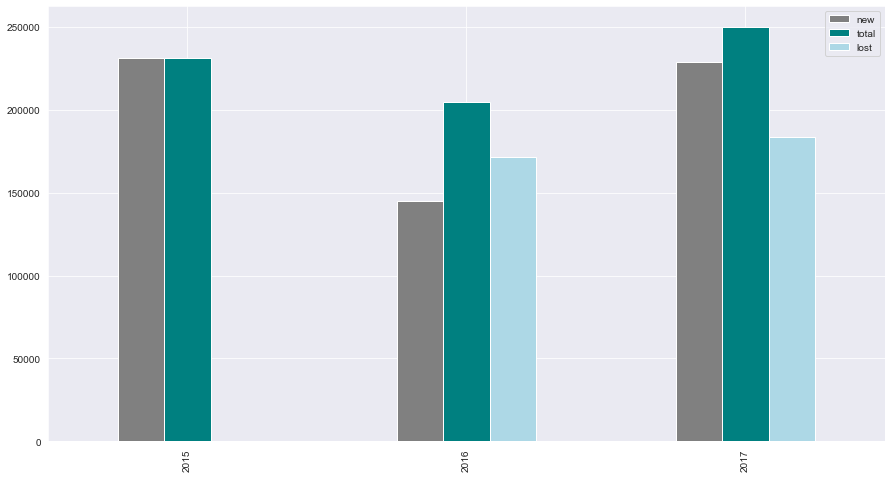

In [224]:
#Unstacked Plot for count of TotalCustomersVsNewCustomersVsLostCustomers 
#The plot doesnot have lost customers as all customers are new in 2015 with respect to the data we have 
#as we dont have data beyond that
#New Customers have increased hence the total customers have also increased when comparing 2016 and 2017 linearly.
new_cust_count = [yrDict['new_customer_count'] for yrDict in dict_byYear.values()]
tot_cust_count = [yrDict['tot_customers'] for yrDict in dict_byYear.values()]
lost_cust_count = [yrDict['lost_customer_count'] for yrDict in dict_byYear.values()]


plotdata = pd.DataFrame({
    "new":new_cust_count,
    "total":tot_cust_count,
    "lost":lost_cust_count
}, index=[2015,2016,2017])
plotdata.plot(kind="bar",figsize=(15, 8),color = ['grey','teal','lightblue']).get_figure().savefig('cust_unstackplot.jpg')
